## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  


In [1]:
%pylab inline 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


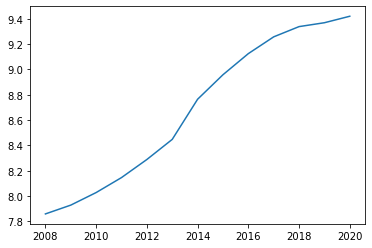

In [2]:
c = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&ALDER=IALT&K%C3%98N=TOT&Tid=*&CIVILSTAND=TOT%2CF", sep=';')
c['TID'] = c['TID'].map(lambda x:x[:-2])

def procent_fraskilt_given_year(year):
    i_alt = c[(c['TID'] == str(year)) & (c['CIVILSTAND'] == 'I alt')]['INDHOLD'].mean()
    skilt = c[(c['TID'] == str(year)) & (c['CIVILSTAND'] == 'Fraskilt')]['INDHOLD'].mean()
    return skilt/i_alt*100

pro = {year: procent_fraskilt_given_year(year) for year in np.arange(2008,2021)}
x, y = zip(*pro.items())
plt.plot(x, y)

In [3]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&ALDER=IALT&K%C3%98N=TOT&CIVILSTAND=U%2CTOT&Tid=2020K4'
data = pd.read_csv(url, sep=';')
data ['TID'] = data['TID'].map(lambda x:x[:-2])

sorted_data  = data[data['CIVILSTAND'] == 'I alt'].sort_values(ascending=False, by='INDHOLD')[5:].drop([187])[:5]
u_gift = data[data['CIVILSTAND'] == 'Ugift']
for index, row in sorted_data.iterrows():
    print(row['OMRÅDE'], u_gift.loc[index-1, 'INDHOLD']/row['INDHOLD'] * 100)

København 65.4896415941411
Aarhus 59.942282391885584
Aalborg 54.82011764169441
Odense 55.196448433803994
Vejle 47.24296061372305


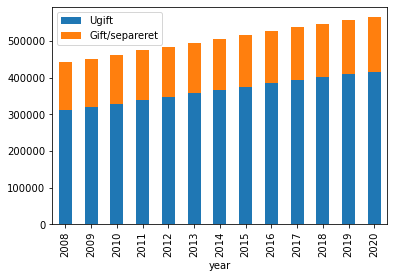

In [4]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&ALDER=IALT&K%C3%98N=TOT&CIVILSTAND=U%2CG&Tid=*'
data = pd.read_csv(url, sep=';')
data ['TID'] = data['TID'].map(lambda x:x[:-2])

vals1 = [data[(data['TID'] == str(year)) & (data['CIVILSTAND'] == 'Ugift')]['INDHOLD'].mean() for year in np.arange(2008,2021)]
vals2 = [data[(data['TID'] == str(year)) & (data['CIVILSTAND'] == 'Gift/separeret')]['INDHOLD'].mean() for year in np.arange(2008,2021)]
d = {'Ugift': vals1, 'Gift/separeret': vals2, 'year': np.arange(2008,2021)}

df = pd.DataFrame(d)
df = df.set_index('year')
df.plot.bar(stacked=True)

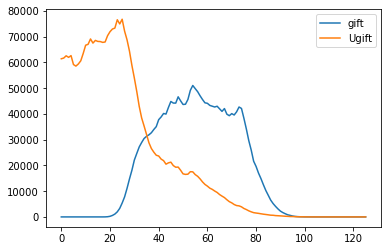

In [22]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&K%C3%98N=TOT&ALDER=*&CIVILSTAND=U%2CG&OMR%C3%85DE=000&Tid=2020K4'
data = pd.read_csv(url, sep=';')
data ['TID'] = data['TID'].map(lambda x:x[:-2])

ages = data['ALDER'][2:][::2].tolist()
gift = data[data['CIVILSTAND'] == 'Gift/separeret'][1:]['INDHOLD']
u_gift = data[data['CIVILSTAND'] == 'Ugift'][1:]['INDHOLD']
d = {'age': ages, 'gift': list(gift), 'Ugift': list(u_gift)}
df = pd.DataFrame(d)
df.plot()

## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [ ]:
import pandas as pd 
url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]